<a href="https://colab.research.google.com/github/ronakjpatel/Data_Science_Projects/blob/master/Data_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD,Adam
from celluloid import Camera

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


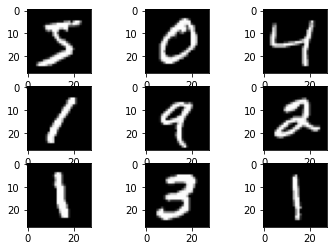

In [ ]:

# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
#splitting the data 
(trainX, trainY), (testX, testY) = mnist.load_data()

# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)



In [ ]:
#function for normalizing the image
def normalize_data(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [ ]:
#creating model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#training the model WITHOUT normalizing the data
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=2)

# evaluate model
_, acc = model.evaluate(testX, testY, verbose=2)
print('> %.3f' % (acc * 100.0))



Epoch 1/10
1875/1875 - 48s - loss: 2.4780 - accuracy: 0.7334 - val_loss: 0.9438 - val_accuracy: 0.7174
Epoch 2/10
1875/1875 - 4s - loss: 0.6464 - accuracy: 0.8305 - val_loss: 0.4221 - val_accuracy: 0.9022
Epoch 3/10
1875/1875 - 4s - loss: 0.3490 - accuracy: 0.9188 - val_loss: 0.2617 - val_accuracy: 0.9390
Epoch 4/10
1875/1875 - 4s - loss: 0.2234 - accuracy: 0.9478 - val_loss: 0.2073 - val_accuracy: 0.9539
Epoch 5/10
1875/1875 - 4s - loss: 0.1396 - accuracy: 0.9658 - val_loss: 0.1607 - val_accuracy: 0.9616
Epoch 6/10
1875/1875 - 4s - loss: 0.1140 - accuracy: 0.9726 - val_loss: 0.1261 - val_accuracy: 0.9674
Epoch 7/10
1875/1875 - 4s - loss: 0.0930 - accuracy: 0.9779 - val_loss: 0.1398 - val_accuracy: 0.9714
Epoch 8/10
1875/1875 - 4s - loss: 0.0704 - accuracy: 0.9819 - val_loss: 0.1267 - val_accuracy: 0.9730
Epoch 9/10
1875/1875 - 4s - loss: 0.0666 - accuracy: 0.9833 - val_loss: 0.1142 - val_accuracy: 0.9737
Epoch 10/10
1875/1875 - 4s - loss: 0.0564 - accuracy: 0.9855 - val_loss: 0.1294 -

In [ ]:
#making list we will use later in creating viz
epochs_list = []
for i in range(1,11):
  epochs_list.append(i)

print(epochs_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
#normalizing the values 
norm_trainX,norm_testX = normalize_data(trainX,testX)

#retraning with normalized values
norm_history = model.fit(norm_trainX, trainY, epochs=10, batch_size=32, validation_data=(norm_testX, testY), verbose=2)

# evaluate model
_, acc = model.evaluate(norm_testX, testY, verbose=2)
print('> %.3f' % (acc * 100.0))



Epoch 1/10
1875/1875 - 35s - loss: 0.1387 - accuracy: 0.9577 - val_loss: 0.0557 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 - 4s - loss: 0.0464 - accuracy: 0.9861 - val_loss: 0.0471 - val_accuracy: 0.9841
Epoch 3/10
1875/1875 - 4s - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0407 - val_accuracy: 0.9866
Epoch 4/10
1875/1875 - 4s - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0448 - val_accuracy: 0.9856
Epoch 5/10
1875/1875 - 4s - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0471 - val_accuracy: 0.9867
Epoch 6/10
1875/1875 - 4s - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.0481 - val_accuracy: 0.9872
Epoch 7/10
1875/1875 - 4s - loss: 0.0072 - accuracy: 0.9975 - val_loss: 0.0471 - val_accuracy: 0.9871
Epoch 8/10
1875/1875 - 4s - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0529 - val_accuracy: 0.9866
Epoch 9/10
1875/1875 - 4s - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0676 - val_accuracy: 0.9853
Epoch 10/10
1875/1875 - 4s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0543 -

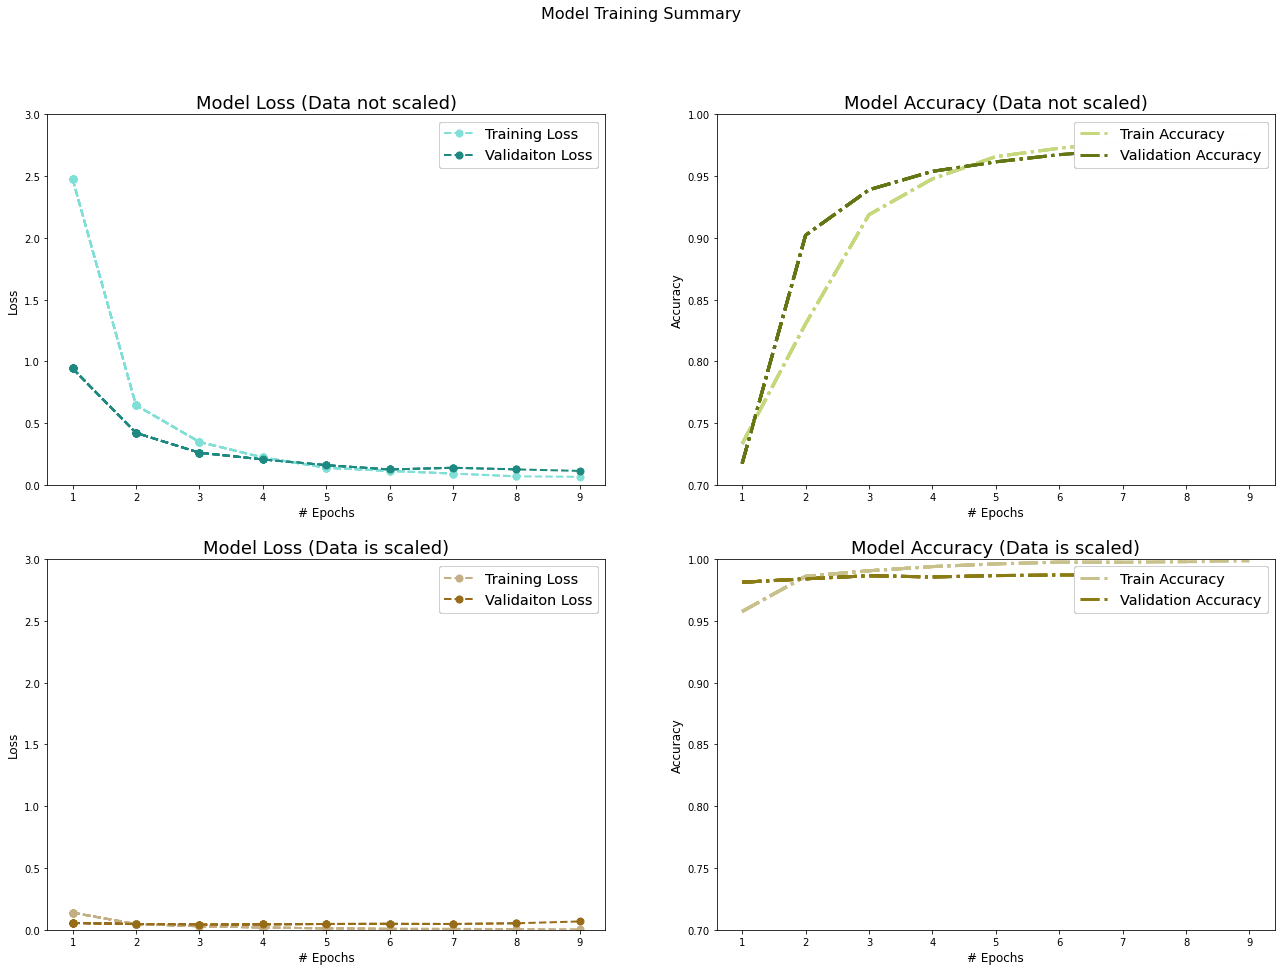

In [155]:
#plotting the results

fig, axes = plt.subplots(2,2,figsize=(22,15))
axes[0,0].axis(ymin=0,ymax=3)
axes[0,1].axis(ymin=0.70,ymax=1)
axes[1,0].axis(ymin=0,ymax=3)
axes[1,1].axis(ymin=0.70,ymax=1)



camera = Camera(fig)
fig.suptitle('Model Training Summary', fontsize=16)
y=True
for i in range(10):

  slice_noscale_loss = history.history['loss'][:i]
  slice_noscale_val_loss = history.history['val_loss'][:i]
  slice_noscale_accuracy = history.history['accuracy'][:i]
  slice_noscale_val_accuracy = history.history['val_accuracy'][:i]

  slice_normal_loss = norm_history.history['loss'][:i]
  slice_normal_val_loss = norm_history.history['val_loss'][:i]
  slice_normal_accuracy = norm_history.history['accuracy'][:i]
  slice_normal_val_accuracy = norm_history.history['val_accuracy'][:i]

  epoch_list_ = epochs_list[:i]




  # multiple line plots
  axes[0,0].set_title('Model Loss (Data not scaled)',fontsize=18)
  axes[0,0].set_xlabel('# Epochs',fontsize=12)
  axes[0,0].set_ylabel('Loss',fontsize=12)
  
  axes[0,0].plot( epoch_list_,slice_noscale_loss, marker='o', markersize=7, color='#80e0d8',linestyle='--', linewidth=2,label='Training Loss')
  axes[0,0].plot( epoch_list_, slice_noscale_val_loss, marker='o', color='#1d8980',markersize=7, linewidth=2, linestyle='--', label="Validaiton Loss")

  axes[0,1].set_title('Model Accuracy (Data not scaled)',fontsize=18)
  axes[0,1].set_xlabel('# Epochs',fontsize=12)
  axes[0,1].set_ylabel('Accuracy',fontsize=12)
  
  axes[0,1].plot( epoch_list_, slice_noscale_accuracy, marker='',linestyle='-.', color='#c6d87c',linewidth=3, label="Train Accuracy")
  axes[0,1].plot( epoch_list_, slice_noscale_val_accuracy, marker='',linestyle='-.', color='#637614',linewidth=3, label="Validation Accuracy")



  
  axes[1,0].set_title('Model Loss (Data is scaled)',fontsize=18)
  axes[1,0].set_xlabel('# Epochs',fontsize=12)
  axes[1,0].set_ylabel('Loss',fontsize=12)
  
  axes[1,0].plot( epoch_list_,slice_normal_loss, marker='o', markersize=7  , color='#c4af84',linestyle='--', linewidth=2,label='Training Loss')
  axes[1,0].plot( epoch_list_, slice_normal_val_loss, marker='o',  markersize=7,color='#976c19', linestyle='--',linewidth=2,label="Validaiton Loss")

  axes[1,1].set_title('Model Accuracy (Data is scaled)',fontsize=18)
  axes[1,1].set_xlabel('# Epochs',fontsize=12)
  axes[1,1].set_ylabel('Accuracy',fontsize=12)
  
  axes[1,1].plot( epoch_list_, slice_normal_accuracy, marker='',linestyle='-.', color='#c9c18b',linewidth=3, label="Train Accuracy")
  axes[1,1].plot( epoch_list_, slice_normal_val_accuracy, marker='',linestyle='-.', color='#8a7b14', linewidth=3,label="Validation Accuracy")

  if y :

    axes[0,0].legend(loc="upper right",fontsize="x-large")
    axes[0,1].legend(loc="upper right",fontsize="x-large")
    axes[1,0].legend(loc="upper right",fontsize="x-large")
    axes[1,1].legend(loc="upper right",fontsize="x-large")
    
    y=False

 
  #plt.show()
  camera.snap()

# show legend



In [156]:
#creating the animation 
animate = camera.animate()

In [151]:



#showing the animation

from IPython.display import HTML

HTML(animate.to_html5_video())